In [40]:
%load_ext autoreload
%autoreload 2
from thumbnails import MeshRenderer
import PIL.Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data paths and meshnames

In [16]:
datapath = '/Users/cam/data/dSpaceX/latest/nanoparticles_mesh/unprocessed_data/shape_representations/'
meshnames = ['1.ply', '2.ply', '100.ply', '200.ply', '1000.ply', '2000.ply']

### Make sure default MeshRenderer is same as pvMeshRenderer (from thumbnails/__init__.py)

In [132]:
from thumbnails.pyvista_mesh_renderer import pvMeshRenderer
rena = MeshRenderer(datapath, meshnames[0])
renb = pvMeshRenderer(datapath, meshnames[0])
print(type(rena))
print(type(renb))
del rena, renb

<class 'thumbnails.pyvista_mesh_renderer.pvMeshRenderer'>
<class 'thumbnails.pyvista_mesh_renderer.pvMeshRenderer'>


### start the default renderer (offscreen with axis-aligned silouette views)

In [133]:
ren = MeshRenderer(datapath, meshnames[0])

### image tests
- get current image
- get the current camera position
- change image, look at that
- set camera position to that of first image and look at that
- render at higher resolution

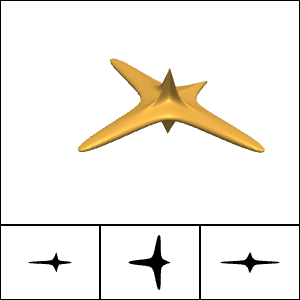

In [134]:
img = ren.getImage()
PIL.Image.fromarray(img)

In [135]:
cpos = ren.getCameraPos()

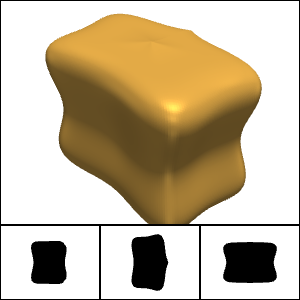

In [137]:
ren.loadNewMesh(meshnames[1])
img = ren.getImage()
PIL.Image.fromarray(img)

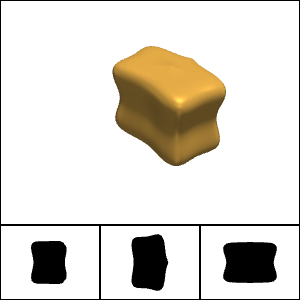

In [138]:
ren.setCameraPos(cpos)
img = ren.getImage()
PIL.Image.fromarray(img)

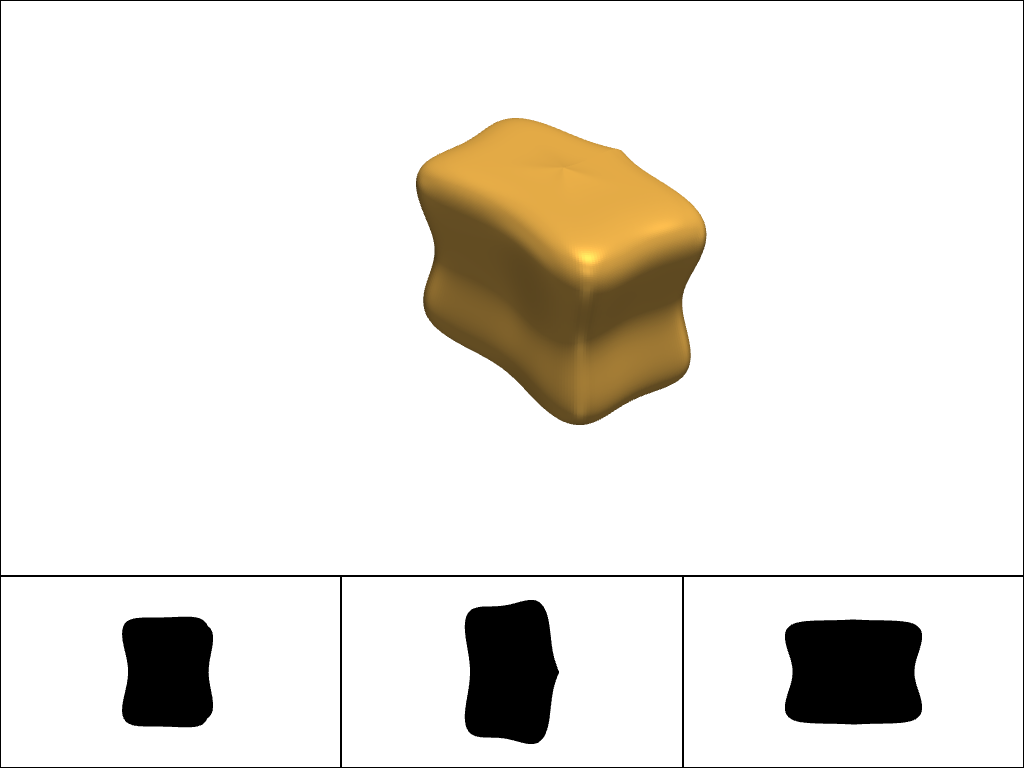

In [139]:
img = ren.getImage(resolution=[1024, 768])
PIL.Image.fromarray(img)

### update vertices test
- generate new vertices using numpy
- update and get new image

In [145]:
import numpy as np
from vtk.util import numpy_support
ren.loadNewMesh(meshnames[0])
verts = ren.polydata.GetPoints()
npverts = numpy_support.vtk_to_numpy(verts.GetData())
npverts.shape

(99856, 3)

In [146]:
npverts[1000:1010]

array([[-0.01496157, -0.02532744, -1.4270215 ],
       [-0.01484068, -0.02630728, -1.4270215 ],
       [-0.01472577, -0.02736507, -1.4270215 ],
       [-0.01461703, -0.02851157, -1.4270215 ],
       [-0.01451468, -0.02975951, -1.4270215 ],
       [-0.01441906, -0.03112415, -1.4270215 ],
       [-0.01433055, -0.03262381, -1.4270215 ],
       [-0.01424961, -0.03428067, -1.4270215 ],
       [-0.01417677, -0.03612181, -1.4270215 ],
       [-0.01411253, -0.03818037, -1.4270215 ]], dtype=float32)

In [147]:
# mutiple the z axis by 2.0
npverts[:,2] *= 2.0
npverts[1000:1010]

array([[-0.01496157, -0.02532744, -2.854043  ],
       [-0.01484068, -0.02630728, -2.854043  ],
       [-0.01472577, -0.02736507, -2.854043  ],
       [-0.01461703, -0.02851157, -2.854043  ],
       [-0.01451468, -0.02975951, -2.854043  ],
       [-0.01441906, -0.03112415, -2.854043  ],
       [-0.01433055, -0.03262381, -2.854043  ],
       [-0.01424961, -0.03428067, -2.854043  ],
       [-0.01417677, -0.03612181, -2.854043  ],
       [-0.01411253, -0.03818037, -2.854043  ]], dtype=float32)

update dem verts3
erff
get dat img, self.sccnt = 3


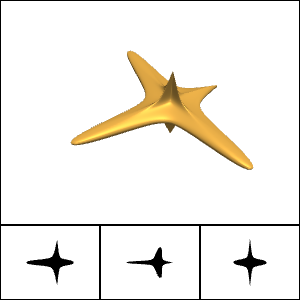

In [218]:
ren.updateVertices(npverts)
img = ren.getImage()
PIL.Image.fromarray(img)

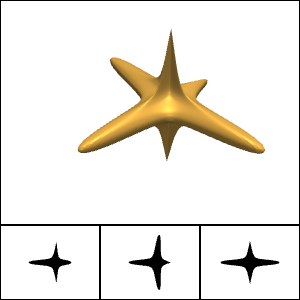

In [156]:
# since we just made z bigger, I like using the original camera view
ren.setCameraPos(cpos)
img = ren.getImage()
PIL.Image.fromarray(img)

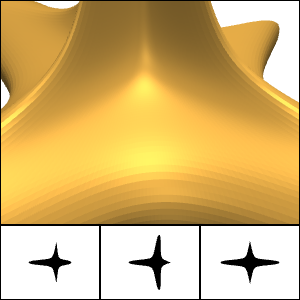

In [149]:
# camera wasn't being reset when vertices were updated. Now it is, so this image will never appear again 

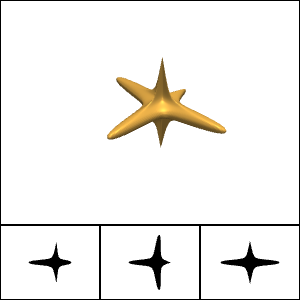

In [154]:
# reset_camera still does it's thing, so not quite as close as the setCameraPos function
ren.plotter.reset_camera()
img = ren.getImage()
PIL.Image.fromarray(img)

### single-image view renderer

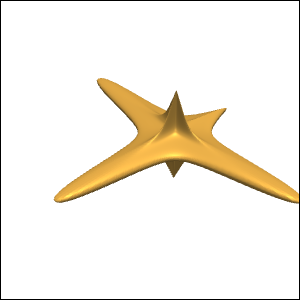

In [159]:
ren = MeshRenderer(datapath, meshnames[0], singleview=True)
img = ren.getImage()
PIL.Image.fromarray(img)

new renderer
load dat mesh
get dat img, self.sccnt = 0


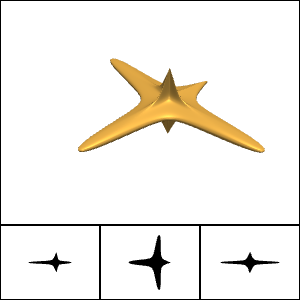

In [377]:
ren = MeshRenderer(datapath, meshnames[0])
img = ren.getImage()
PIL.Image.fromarray(img)

In [388]:
img.dtype

dtype('uint8')

In [389]:
img.shape

(300, 300, 3)

In [391]:
img.

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [205]:
pts = np.random.random(verts.GetNumberOfPoints()*3)
pts

array([0.73564204, 0.96891239, 0.90014109, ..., 0.76373853, 0.09978778,
       0.08496241])

In [215]:
lmnopverts = npverts.copy()

In [385]:
lmnopverts[:,0] /= 20.5

update dem verts5
get dat img, self.sccnt = 5


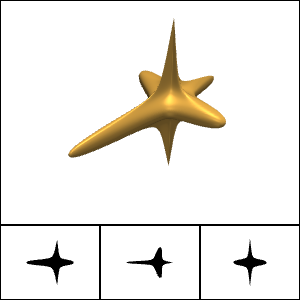

In [386]:
ren.updateVertices(lmnopverts)
img = ren.getImage()
PIL.Image.fromarray(img)

In [387]:
ren.plotter.bounds

[-2.31793212890625,
 4.3448638916015625,
 -2.1649343967437744,
 2.1649343967437744,
 -3.23586368560791,
 3.23586368560791]

In [300]:
ren.plotter.reset_camera()
ren.plotter.isometric_view()

In [374]:
import pyvista
mesh = pyvista.PolyData(ren.polydata)

In [392]:
pimg = PIL.Image.fromarray(img)

In [394]:
help(pimg.save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.Image.Image instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename extension.
       I

In [185]:
foo=0
foo+=1
foo
foo +=1
foo
class wtf:
    def __init__(self):
        self.ihate = 0
        
    def hatemore(self):
        print(self.ihate)
        self.ihate+=1
        
w=wtf()
for i in range(10):
    w.hatemore()
    
    

0
1
2
3
4
5
6
7
8
9


### onscreen interactive renderer

In [166]:
ren = MeshRenderer(datapath, meshnames[0], singleview=True, onscreen=True)

In [171]:
ren = MeshRenderer(datapath, meshnames[0], singleview=False, onscreen=True)